# Aprendizaje Automático
# Projecto Final

Profesor: Felipe Meza

Tecnológico de Costa Rica, 

Programa Ciencia de Datos

---

Estudiantes:

1. Sophia Contreras
2. Yoksan Varela
3. Mauro Víquez

Lista de las librerias por ser usadas:

In [24]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

## Descripcion del problema
En el portafolio de productos para Intervenciones Cardiacas de BSC, existe un producto llamado Watchmen. La funcion de este producto es ayudar a los pacientes que subre de una enfermedad llamada Fibrilacion Auricular No Valvular (NVAF por sus siglas en ingles), la cual consiste en un tipo comun de ritmo cardiaco irregular que afecta la parte superior del corazon (las auriculas) y puede aumentar el riesgo de coagulos sanguineos, accidentes cerebrovasculares y otras complicaciones cardiovasculares.

Tradicionalmente, el tratamiento de esta condicion implica un consumo de anti-coagulantes, lo cual puede ser una situacion tediosa y complicada para los pacientes (sin tomar en cuenta efectos secundarios del medicamento). El dispositivo Watchmen fue creado como tratamiento alternativo para esta enfermedad, ya que este se introduce dentro del corazon y su funciones de "cerrar" las cavidades donde los coagulos se pueden generar, de manera que el paciente puede minimizar el uso de medicamentos anti-coagulantes.

El siguiente enlace muestra generalidades del producto y como se implanta: https://www.youtube.com/watch?v=1f33kyMh9rM. Interesante rescatar del video que el procedimiento medico toma alrededor de 1 hora y el paciente solo debe estar hospitalizado durante un dia.

El dispositivo esta compuesto por varias partes, pero para efectos practicos, solo vamos a referirnos a la estructura de metal que esta por debajo de la malla de recubrimiento y sera referenciada como el esqueleto del Watchmen. Ese esqueleto esta hecho de Nitinol, una aleacion de niquel con titanio tiene muchas caracteristicas interesantes, pero la mas relevante para este estudio es que el Nitinol tiene memoria de forma, lo que implica que las estructuras hechas con este material van a recuperar su forma inicial despues de ser deformada, aunque esta deformacion se repita multiples veces.

Esto implica un reto a la hora de producir este esqueleto dado que, inicialmente, no tiene la formal final que se observa en el video; ademas que existen varios tamanos de Watchmen dado que existen varios tamanos de corazon. Para poder darle la forma final, el esqueleto se debe someter a diferentes tratamientos quimicos y fisicos para poder desgastar parte del material y ser moldeado al mismo tiempo.

El reto que queremos resolver podrian ser:
- Predecir cuanto material del esqueleto se va a perder durante los procesos de moldeado (Problema de regresion)
- Predecir si el esqueleto va a pasar los controles de calidad o va a ser desechado como scrap (Problema de categorizacion)

Es importante aclarar que, inicialmente, el set de datos completo cuenta con esqueletos de todos los tamanos, pero este estudio solamente sera enfocado al tamano de 20 mm.

### Primera parte: Pre-procesado del set de datos
Importemos el set de datos creando un dataframe:

In [25]:
dataset_Wathcmen = pd.read_csv("https://raw.githubusercontent.com/YoksanVC/TEC_DataScienceCert/main/Module_2_AprendizajeAutomatico/BSC_Dataset/ep_tank_chem_change_mass_scrap_dt.csv", header=0, delimiter=',')
dataset_Wathcmen.head()

,Counter,Tank1EPProcessTemperature,Tank1EPPumpSpeed,Tank1EPPumpFlow,Tank1ResisChk,EPEndRunDT,EPMassEndRunDT,BatchNo,PartName,Size,...,EPEndRunDT_CST,start_tank_chg,end_tank_chg,tank_chg_period,conduc_test_count,total_period_mass,group_index,fi_submitter_name,UnitDispo,Part
0,0,-58.43495,8541.579,0.414121,-65537,25:47.4,12:57.7,32370648,32370648-003,27mm,...,25:47.4,9/13/2023 19:01,9/14/2023 17:56,0 days 22:55:50,0,68.8,0,ekoueba,*PASS,32370648-003
1,1,-59.41647,1378.097,7.053833,-65536,02:01.0,05:53.2,32387101,32387101-003,24mm,...,02:01.0,9/14/2023 17:56,9/15/2023 2:12,0 days 08:15:25,1,573.9,1,dunorp,*PASS,32387101-003
2,2,-59.39440,1390.652,6.905866,-65536,02:01.0,05:27.6,32387101,32387101-001,24mm,...,02:01.0,9/14/2023 17:56,9/15/2023 2:12,0 days 08:15:25,1,573.9,1,dunorp,*PASS,32387101-001
3,3,-59.42896,1374.368,6.841251,-65536,21:11.1,12:06.9,32387101,32387101-009,24mm,...,21:11.1,9/14/2023 17:56,9/15/2023 2:12,0 days 08:15:25,1,573.9,1,dunorp,*PASS,32387101-009
4,4,-59.12017,1375.269,7.009933,-65536,21:11.1,11:42.8,32387101,32387101-007,24mm,...,21:11.1,9/14/2023 17:56,9/15/2023 2:12,0 days 08:15:25,1,573.9,1,dunorp,*PASS,32387101-007


Como solo estamos interesados en los datos de esqueletos de 20mm, se procede a hacer un nuevo dataset con los datos de ese tamano:

In [26]:
dataset_20mm = dataset_Wathcmen.loc[dataset_Wathcmen['Size'] == "20mm"]
dataset_20mm.head()

,Counter,Tank1EPProcessTemperature,Tank1EPPumpSpeed,Tank1EPPumpFlow,Tank1ResisChk,EPEndRunDT,EPMassEndRunDT,BatchNo,PartName,Size,...,EPEndRunDT_CST,start_tank_chg,end_tank_chg,tank_chg_period,conduc_test_count,total_period_mass,group_index,fi_submitter_name,UnitDispo,Part
7,7,-59.32403,1374.678,6.924414,-65536,55:16.7,06:38.8,32387011,32387011-005,20mm,...,55:16.7,9/14/2023 17:56,9/15/2023 2:12,0 days 08:15:25,1,573.9,1,morem10,*PASS,32387011-005
8,8,-59.47844,1373.398,6.901890,-65536,55:16.7,06:16.5,32387011,32387011-004,20mm,...,55:16.7,9/14/2023 17:56,9/15/2023 2:12,0 days 08:15:25,1,573.9,1,morem10,WM34-Tweezers Mark/ContactMark,32387011-004
9,9,-59.34805,1365.239,7.110339,-65536,58:16.8,08:09.0,32387011,32387011-009,20mm,...,58:16.8,9/14/2023 17:56,9/15/2023 2:12,0 days 08:15:25,1,573.9,1,morem10,*PASS,32387011-009
10,10,-59.42452,1368.157,6.715863,-65536,58:16.8,07:25.7,32387011,32387011-007,20mm,...,58:16.8,9/14/2023 17:56,9/15/2023 2:12,0 days 08:15:25,1,573.9,1,morem10,*PASS,32387011-007
11,11,-59.41494,1384.787,6.880256,-65536,17:54.9,09:20.4,32387011,32387011-013,20mm,...,17:54.9,9/14/2023 17:56,9/15/2023 2:12,0 days 08:15:25,1,573.9,1,morem10,*PASS,32387011-013


Analizemos la cantidad de instancias luego del filtrado:

In [27]:
dataset_20mm.shape

(1235, 26)

Contamos con 1235 instancias en este momento, con 26 columnas. Las clases en este caso es la columna llamada  "Qty Rem", la cual contiene la cantidad de material (en gramos) perdido durante el proceso; y "UnitDispo" el cual contiene si el esqueleto paso los criterior de calidad o si fue scrap. 

El problema en este momento es que tenemos 25 columnas con datos, asi que se procede a eliminar las siguientes columnas:
- Counter: Es un consecutivo creado por el proceso de extraccion de datos, no tiene utilidad.
- Size: Ya no necesitamos esta columna porque ya filtramos con los datos de esta.
- EP EQR: Numero de control de los equipos, todas las mediciones usan el mismo.
- EPEndRunDT, EPEndRunDT_CST: Estos features hacen referencia al tiempo del proceso que tienen los datos duplicados, ademas que hay otra columna de tiempo que tenemos que parece tener mejor informacion.
- Start Mass, Final Mass y Percent Rem: Estos 3 features no son necesarios porque hacen referencia a la clase de interes. El calculo que se hace en el sistema para "Qyt Rem" es la resta de Start Mass y Final Mass; Percent Rem es lo mismo que Qty Rem pero en porcentaje.
- start_tank_chg y end_tank_chg: Estos dos se puede eliminar dado que tank_chg_period es la diferencia entre ellos, lo cual es el dato de interes.
- conduc_test_count: El feature group_index provee informacion redundate de este atributo.
- total_period_mass: El feature group_index provee informacion redundate de este atributo.
- fi_submitter_name: Quien hizo el registro del dato, no es relevante para el estudio.
- Part: Feature redundante con PartName.

Las siguientes columnas necesitan un poco mas de investigacion para ver si tienen que ser desechadas o no:
- BatchNo: Numero de lote del esqueleto
- ProcessEntity: Se refiere al tanque donde se hizo el proceso. Solo hay dos tanques, asi que hay que analizar si hay algun efecto con usar uno o el otro.
- Tank1ResisChk: Este feature solo tiene dos valores, y la diferencia es solo una unidad numerica entre ambos valores.

Eliminando los features mencionados anteriormente:

In [28]:
dataset_20mm = dataset_20mm.drop(columns=['Counter','Size','EP EQR','EPEndRunDT','EPEndRunDT_CST','Start Mass','Final Mass','Percent Rem','start_tank_chg','end_tank_chg','conduc_test_count','total_period_mass','fi_submitter_name','Part'])

In [29]:
dataset_20mm.head()

,Tank1EPProcessTemperature,Tank1EPPumpSpeed,Tank1EPPumpFlow,Tank1ResisChk,EPMassEndRunDT,BatchNo,PartName,ProcessEntity,Qty Rem,tank_chg_period,group_index,UnitDispo
7,-59.32403,1374.678,6.924414,-65536,06:38.8,32387011,32387011-005,EPTank,39.1,0 days 08:15:25,1,*PASS
8,-59.47844,1373.398,6.901890,-65536,06:16.5,32387011,32387011-004,EPTank,40.9,0 days 08:15:25,1,WM34-Tweezers Mark/ContactMark
9,-59.34805,1365.239,7.110339,-65536,08:09.0,32387011,32387011-009,EPTank,39.6,0 days 08:15:25,1,*PASS
10,-59.42452,1368.157,6.715863,-65536,07:25.7,32387011,32387011-007,EPTank,40.0,0 days 08:15:25,1,*PASS
11,-59.41494,1384.787,6.880256,-65536,09:20.4,32387011,32387011-013,EPTank,40.5,0 days 08:15:25,1,*PASS


In [30]:
dataset_20mm.shape

(1235, 12)

Reordenando las columnas para que ambas clases queden al extremo derecho:

In [31]:
new_order=['Tank1EPProcessTemperature','Tank1EPPumpSpeed','Tank1EPPumpFlow','Tank1ResisChk','EPMassEndRunDT','BatchNo','PartName','ProcessEntity','tank_chg_period','group_index','Qty Rem','UnitDispo']
dataset_20mm = dataset_20mm[new_order]
dataset_20mm.head()

,Tank1EPProcessTemperature,Tank1EPPumpSpeed,Tank1EPPumpFlow,Tank1ResisChk,EPMassEndRunDT,BatchNo,PartName,ProcessEntity,tank_chg_period,group_index,Qty Rem,UnitDispo
7,-59.32403,1374.678,6.924414,-65536,06:38.8,32387011,32387011-005,EPTank,0 days 08:15:25,1,39.1,*PASS
8,-59.47844,1373.398,6.901890,-65536,06:16.5,32387011,32387011-004,EPTank,0 days 08:15:25,1,40.9,WM34-Tweezers Mark/ContactMark
9,-59.34805,1365.239,7.110339,-65536,08:09.0,32387011,32387011-009,EPTank,0 days 08:15:25,1,39.6,*PASS
10,-59.42452,1368.157,6.715863,-65536,07:25.7,32387011,32387011-007,EPTank,0 days 08:15:25,1,40.0,*PASS
11,-59.41494,1384.787,6.880256,-65536,09:20.4,32387011,32387011-013,EPTank,0 days 08:15:25,1,40.5,*PASS


Se procede a analizar los 3 features en cuestion para ver si es necesario descartarlos: BatchNo, ProcessEntity y Tank1ResisChk. Para hacer este analisis, la clase UnitDispo va a ser el filtro para entender como se afecta la segregacion de los esqueletos.

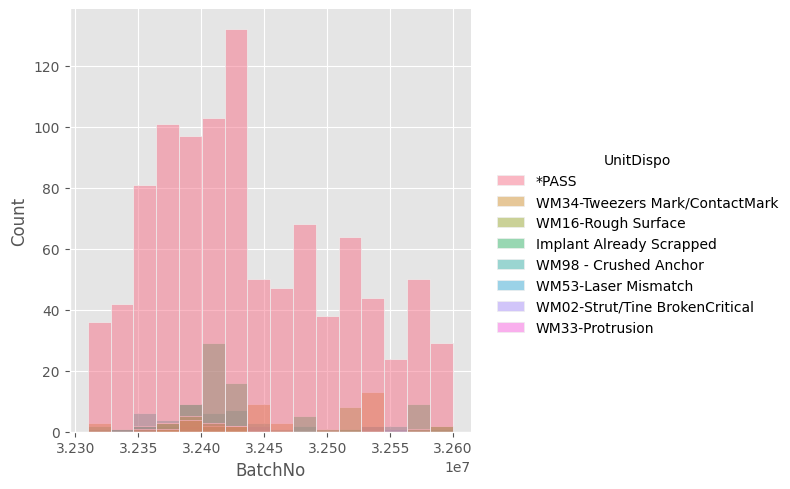

In [32]:
sns.displot(dataset_20mm, x='BatchNo',hue='UnitDispo')

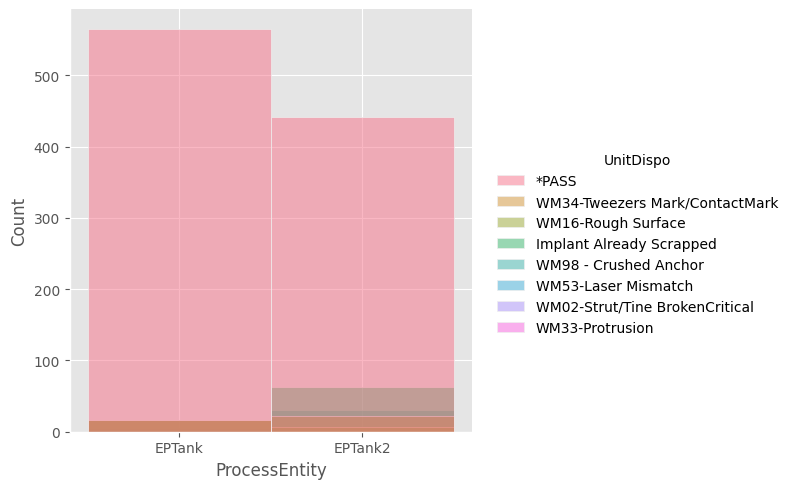

In [33]:
sns.displot(dataset_20mm, x='ProcessEntity',hue='UnitDispo')

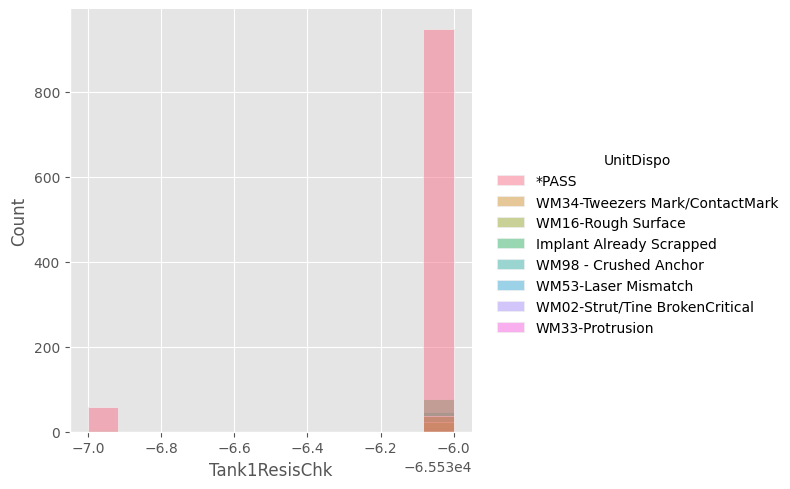

In [34]:
sns.displot(dataset_20mm, x='Tank1ResisChk',hue='UnitDispo')

El feature Tank1ResisChk no provee valor para predecir la disposicion de las unidades. Este atributo se eliminara. ProcessEntity muestra una relacion interesante con respecto a la disposicion: el EPTank genera menos scrap y cuando lo hace, es solo con el codigo de WM34, que hace referencia mas a problemas de manipulacion que otra cosa, asi que por ahora se mantendra el feature. Como era de esperarse, el BatchNo tiene una distribucion bastante normal con respecto a la dispocion de esqueletos. Tanto BatchNo como PartName no van a dar mucho valor dado que ambos son atributos de serializacion a nivel de produccion, pero no proveen informacion valiosa que ayuda a predecir cualquier de las dos clases, asi que ambos atributos seran eliminados del dataset.

Por lo tanto, al final se mantienen 9 atributos para las dos clases en cuestion:
- Tank1EPProcessTemperature: Temperatura del tanque.
- Tank1EPPumpSpeed: Velocidad de bombeo.
- Tank1EPPumpFlow: Flujo de bombeo.
- EPMassEndRunDT: Tiempo de proceso.
- ProcessEntity: Tanque donde se realizo el proceso.
- tank_chg_period: Tiempo entre cambios de tanque.
- group_index: grupo de esqueletos.

In [35]:
dataset_20mm = dataset_20mm.drop(columns=['Tank1ResisChk','BatchNo','PartName'])

In [36]:
dataset_20mm.head()

,Tank1EPProcessTemperature,Tank1EPPumpSpeed,Tank1EPPumpFlow,EPMassEndRunDT,ProcessEntity,tank_chg_period,group_index,Qty Rem,UnitDispo
7,-59.32403,1374.678,6.924414,06:38.8,EPTank,0 days 08:15:25,1,39.1,*PASS
8,-59.47844,1373.398,6.901890,06:16.5,EPTank,0 days 08:15:25,1,40.9,WM34-Tweezers Mark/ContactMark
9,-59.34805,1365.239,7.110339,08:09.0,EPTank,0 days 08:15:25,1,39.6,*PASS
10,-59.42452,1368.157,6.715863,07:25.7,EPTank,0 days 08:15:25,1,40.0,*PASS
11,-59.41494,1384.787,6.880256,09:20.4,EPTank,0 days 08:15:25,1,40.5,*PASS


Ya con el primer barrido de atributos listo, se procede a transformar los datos le las columnas que pueden ser complicados de manejar, como las dos columnas que tienen datos de tiempo. Pero antes, se va a revisar si hay NaN y eliminar esas instancias:

In [37]:
dataset_20mm.isnull().sum()

Tank1EPProcessTemperature     0
Tank1EPPumpSpeed              0
Tank1EPPumpFlow               0
EPMassEndRunDT                0
ProcessEntity                 0
tank_chg_period               0
group_index                   0
Qty Rem                       0
UnitDispo                    22
dtype: int64

In [39]:
dataset_20mm.dropna(inplace=True)
dataset_20mm.isnull().sum()

Tank1EPProcessTemperature    0
Tank1EPPumpSpeed             0
Tank1EPPumpFlow              0
EPMassEndRunDT               0
ProcessEntity                0
tank_chg_period              0
group_index                  0
Qty Rem                      0
UnitDispo                    0
dtype: int64

In [43]:
for attribute in dataset_20mm:
    print(f"{attribute} is type {dataset_20mm[attribute].dtype}")

Tank1EPProcessTemperature is type float64
Tank1EPPumpSpeed is type float64
Tank1EPPumpFlow is type float64
EPMassEndRunDT is type object
ProcessEntity is type object
tank_chg_period is type object
group_index is type int64
Qty Rem is type float64
UnitDispo is type object
